In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Champion tags, are they trustable?

**The Point of this workbook is to find how 'reliable' Riot Games' champion tags are.**

To verify Riot Games' champion tags' validity, I have decided to use k-means clustering to have the computer group the champions together.

On first view, some of the tags used by riot do not make sense. For example, Hecarim has a Style meter of 7, though his 'skillshot' is only the ultimate that he has to aim for a good knockback, and most of the time the Hecarim user will be mashing Q to activate his rampage and Trinity force buffs while auto attacking. Another silly measure by Riot is the 'mobility' score, where Nocturne, which only has a mobility buff after using his semi-global ultimate has a score of 3. On the other hand, Javan IV and Vi, who can close gaps over 1000 distance in an instant, have a mobility score of 2, which is same as Volibear (who lacks the ability to close in instantly.. all he has is a up to 85% run speed buff)

Also, the 'difficulty' of the champion is the 'mechanics' difficulty, not the game difficulty. The 'difficulty' parameter does not take any other factors such as team reliance or early game hassles in consideration.


In [ ]:
import pandas as pd
filename = "/kaggle/input/modified-lol-champions-dataset/LoL-Champions.csv"
df = pd.read_csv(filename)
df.head()

In [ ]:
df.describe()

In [ ]:
df.dtypes

To help my analysis, I added 2 other separate datasets based on my experience with League of Legends.

Melee/Ranged is the obvious parameter here. It is a measure whether the champion's basic attack is melee or ranged. I have put transforming champions Jayce, Nidalee and Elise as ranged, as they start out as ranged, and their melee forms are situational. (Usually used during mop-up situations after the poking damage has been done). Range 0 is melee, Range 1 is normal ranged, and Range 2 is 'poker', such as Jayce, Varus, and Lulu

Farm is a parameter which could be controversial, as it was done primarily based on my experience, rather than champion's item stats. I defined farm as 'amount of farm needed for a champion to get online' 1 is support-level farming (think supporters like Soraka or Thresh which would need minimal items to be effeective in a 5v5 fight), while 2 is top lane tank / bruiser level farming which involves a couple of 3000+ gold damage itmes and the rest of the slot are 2000~3000 survivability items. Examples of type 2 would be bruisers such as Renekton or Jarvan IV. Type 3 is the glass cannon carry, who stocks up on 3000+ gold damage itmes and finish their set with a Guardian Angel (most ADCs, mages). Therefore, it would be hard to explain certain champions who play different roles (ex : Karma, Morgana and Zyra, who can be played as mid mages or supports)



In [ ]:
#Champion name set to index
df=df.set_index('Name')
df.head(5)

In [ ]:
df.head(20)

In [ ]:
#Change DamageType to a numeric variable
#1 for magical
#3 for physical

df.loc[df['DamageType'].astype(str).str.match('M'), 'DamageType'] = 1
df.loc[df['DamageType'].astype(str).str.match('PM'), 'DamageType'] = 2
df.loc[df['DamageType'].astype(str).str.match('P'), 'DamageType'] = 3
df.tail(20)

In [ ]:
#check after damage type change.
df.dtypes

In [ ]:
#Prepare data for training.
#Remove all non numerical data, which are not relevant anyway. Class will be joined later onwards.
df_train = df.drop(['Id','Class',], axis=1)

In [ ]:
#perform k_means clustering
features = list(df_train.columns)
data = df_train[features]

In [ ]:
#check for missing Values
nan_rows = data[data.isnull().T.any().T]
nan_rows.head()
#Ekko has Functionality NaN for some reason. Check with Riot site. Functionality 1.
data = data.fillna(1)

In [ ]:
#We will make 6 clusters as Riot's initial classes were 6.
#Support, Warrior, Tank, Marksman, Assassin, Mage
clustering_kmeans = KMeans(n_clusters=6, precompute_distances="auto", n_jobs=100)

In [ ]:
data['clusters'] = clustering_kmeans.fit_predict(data).astype(int)

In [ ]:
print(data.info())

In [ ]:
data.head(5)

# Does correlation study tell you about champion roles?

As stated above, 

In [ ]:
df_corr = df.drop(['Id','Class',], axis=1)
VarCorr = df_corr.corr()
print(VarCorr)
sns.heatmap(VarCorr,xticklabels=VarCorr.columns,yticklabels=VarCorr.columns)

In [ ]:
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import colors
import matplotlib.cm as cm

In [ ]:
#plt.scatter(data.Style, data.Difficulty, s=300, c=data.clusters)

fig, ax = plt.subplots()
colormap = cm.viridis
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, 8)]
LABEL_COLOR_MAP = {0 : 'red',
                   1 : 'blue',
                   2 : 'green',
                   3 : 'cyan',
                   4 : 'magenta',
                   5 : 'orange'
                   }
label_color = [LABEL_COLOR_MAP[l] for l in data['clusters']]


#for i,c in enumerate(colorlist):

 #   x = data['Style'][i]
 #   y = data['Difficulty'][i]
 #   l = data['clusters'][i]
scatter = ax.scatter(x=data['Style'], y = data['Difficulty'], s=300, linewidth=0.1, c=label_color)

plt.xlabel('Style', fontsize = 14)
plt.ylabel('Difficulty', fontsize = 14)


plt.show()

# Clusters at a glance


This is the graph of the centroids. The high values are highlighted with red, while low values are highlighted in green.

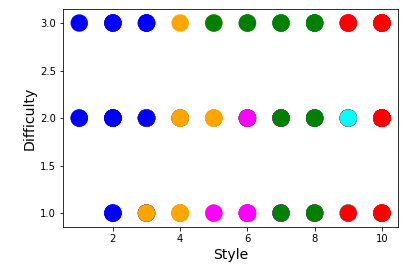
Due to the nature of the k-means clustering, sometimes the graph could vary from time to time. I would use this graph here to explain.
(Graphed At 2020.04.09)

For your convenience, here is the color code of the clusters.
                   0 : 'red',
                   1 : 'blue',
                   2 : 'green',
                   3 : 'cyan',
                   4 : 'magenta',
                   5 : 'orange',

Now we have the 8 clusters ready. 
I have not included the legends because it might ruin the visiblity of the scatterplot.
(But it's League of Legends...T_T)

In [ ]:
print(clustering_kmeans.cluster_centers_)
print(type(clustering_kmeans.cluster_centers_))

pd.DataFrame(clustering_kmeans.cluster_centers_).to_csv('results0409.csv', index=False)


# Centroid table

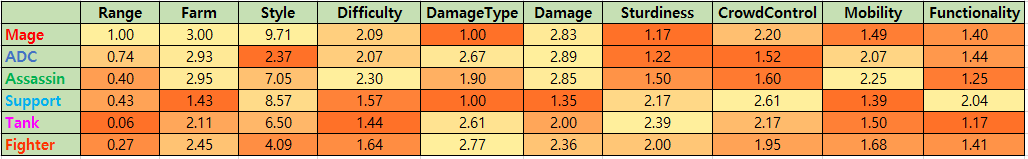

This is the table of the Centroid values, (I'm not an artist, so bear with the eyestrain from the color scheme)



In [ ]:
#Cluster 1
#Modified to include Class and Damage Type
data_0 = data.reset_index().merge(df,how="left").set_index(data.index.names)
data_0 = data_0[data_0['clusters'] == 0]
data_0 = data_0.drop(['Id'],axis=1)
data_0 = data_0.drop_duplicates()
data_0.head(40)

# Cluster 1 - Mage (Red)

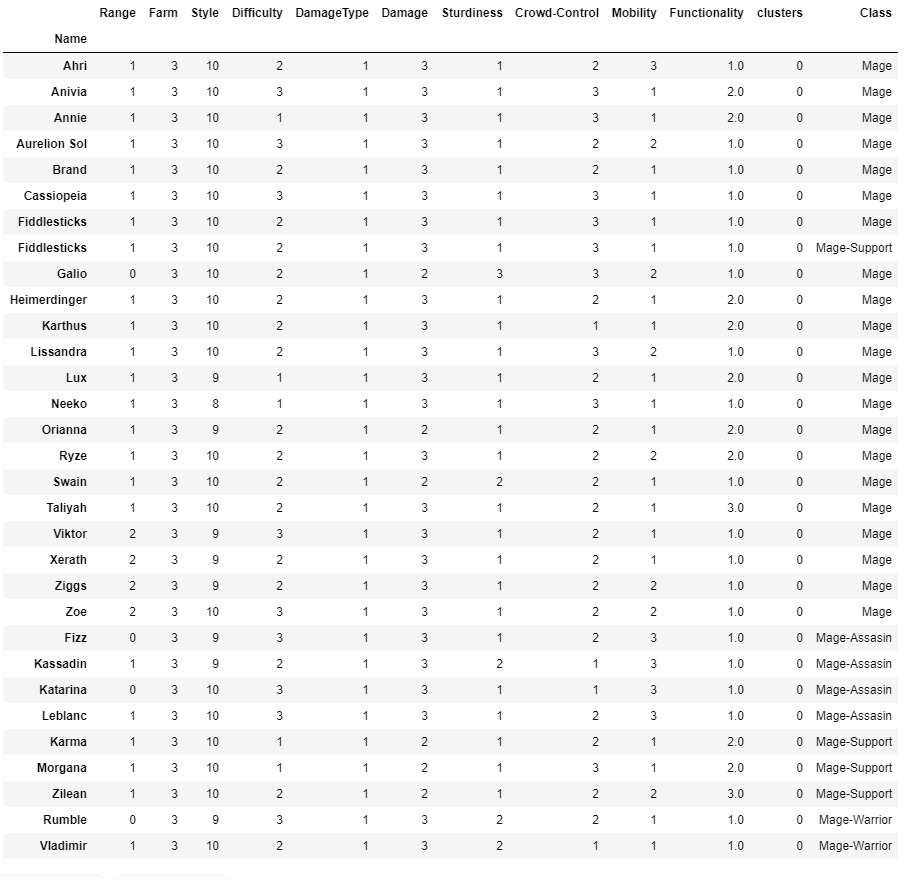

Image as of 2020.04.09 Run

Notable Champions : LeBlanc, Rumble, Karthus, Ryze

Outliers : None.

The mage cluster is one of the most obvious, in terms of both game characters and the 'magic wielder' stereotype.
The Defining stats of the mages is high spell damage reliance (high style, 9.71) and magical damage type (1)
They are squishy wizards, as seen from their measly sturdiness of 1.17.

However, it would be nice to distinguish between the playstyles of mages. 

Likes of LeBlanc and Kassadin jump out of nowhere to nuke a single target and disappear to safety.
Brand and Viktor unleash destruction on the entire enemy team, instead of taking down pinpoint targets. 
Rumble and Vladimir act somewhat like warriors, making up for their lack of range with their durability.
Ziggs and Karma can't burst like LeBlanc or infight like Rumble, but can poke from safety and gnaw at enemy health bars.
Maybe a burst / sustain parameter and a AOE/Single parameter could do well to distinguish these champions.


In [ ]:
data_1 = data.reset_index().merge(df,how="left").set_index(data.index.names)
data_1 = data_1.drop(['Id'],axis=1)
data_1 = data_1[data_1['clusters'] == 1]
data_1 = data_1.drop_duplicates()
data_1.head(40)

# Cluster 2 - Autoattack ADC (Blue)

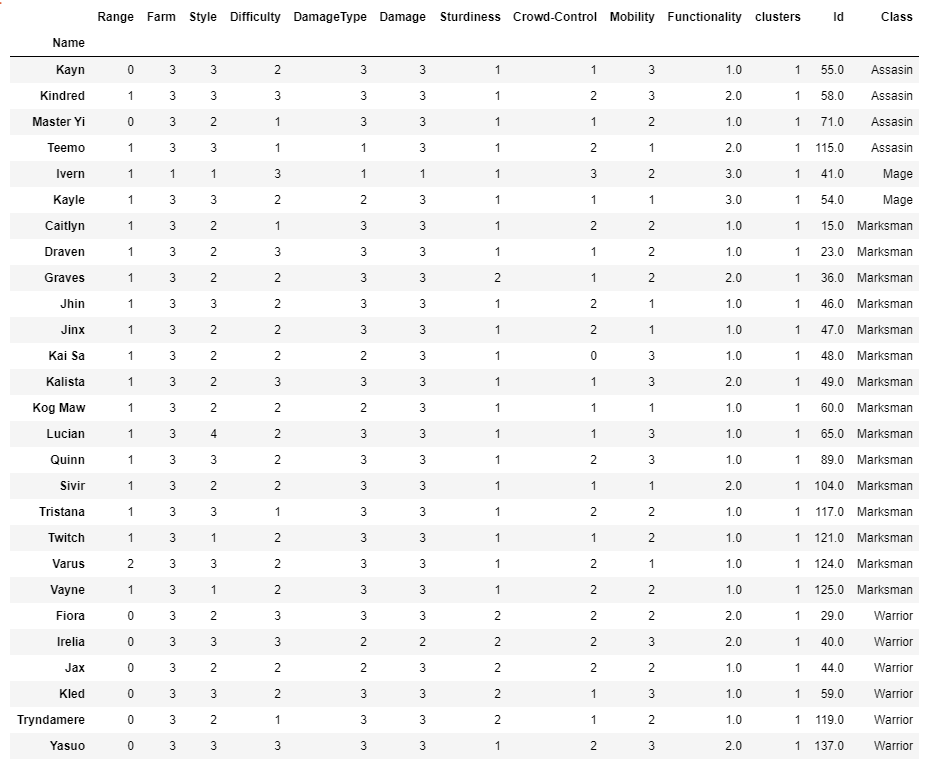

Image as of 2020.04.09 Run

Notable Champions : Twitch, Jax, Caitlyn, Vayne

Outliers : **Ivern (big)**, Varus, Lucian (maybe)

Contrary to mages, the ADCs rely more on the autoattacks (right-clicks) to dish out physical(DType 2.67) sustained damage. (Style 2.37) Similar to mages, they have high damage outputs (2.89) and farm dependence (2.93), and suffer from lack of sturdiness (1.22) and crowd control(1.52)

It is interesting that the computer grouped the melee and ranged ADCs together.
Currently, most autoattack ADCs are having a hard time in competitive esports. Especially when it comes to melee ADCs, as Yasuo (and maybe Jax) is the only one to successfully settle in the competitive scene. Its due to their lack of sturdiness, crowd control and utility. The fact that audience has to see minutes of farming with no fancy skill shots does not help them, as Riot will not want to see those in their esports scene.

**The biggest outlier here is Ivern, who is not even an ADC.** However, his parameters such as low style and low durablity might have led the computer to group him here. I consider Varus and Lucian to be other outliers in this cluster, as they have much more than just right-clicking to deal damage. Especailly Varus, who is also used as a mid-lane spellcaster who can snipe enemies from outside the screen.

In [ ]:
data_2 = data.reset_index().merge(df,how="left").set_index(data.index.names)
data_2 = data_2.drop(['Id'],axis=1)
data_2 = data_2[data_2['clusters'] == 2]
data_2 = data_2.drop_duplicates()
data_2.head(40)

# Cluster 3 - Assassins (Green)

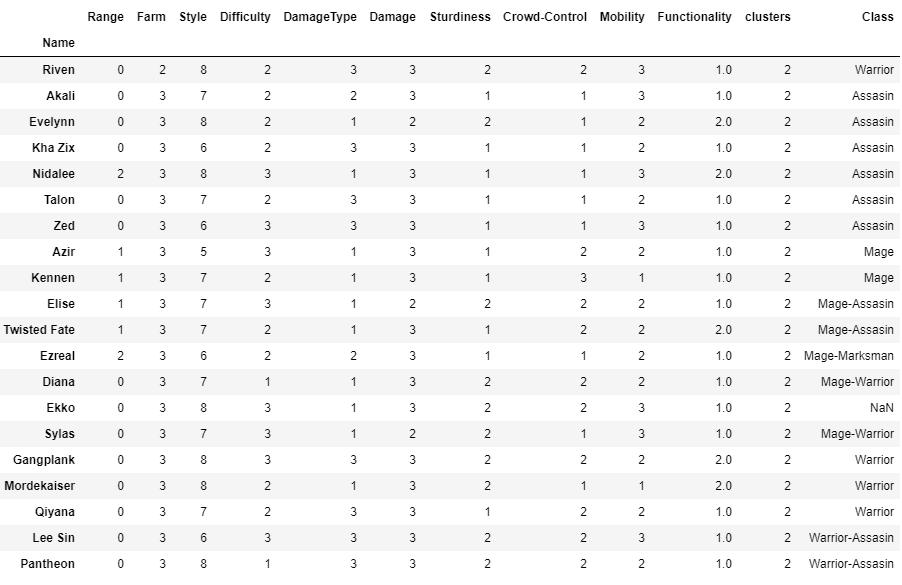

Image as of 2020.04.09 Run

Notable Champions : Akali, Riven, Kha Zix, Lee Sin, Talon, Zed

Outliers : Azir, Kennen, Ezreal, **Mordekaiser**, **Gangplank**

Assassins are the hardest of all,as they have high skill reliance (Style 7.05) and highest mechanics hurdle (difficulty 2.30), so you better have good reflexes / keyboard pressing skills.
They are the mix between the ADC and the mage, as they mostly deal physical damage(1.90) and are control intesnsive. Furthermore, they are mostly melee (range 0.40), but there are some ranged ones, **as sniping also counts as a valid mean of assassination.**

**There are two big outliers, Gangplank and Mordekaiser.** Both of them are heavily reliant on skills and can dish out damage, so they qualify for the first hurdle of an assassin. But they severely lack on the mobility part (especially Mordekaiser), and thus are played more as warriors, as their tags suggest. 

Ezreal is another interesting exception. He is the only champion with mage-marksman tag, and relies heavily on his Q to snipe enemies from afar. His damage output, skill reliance, and high mobility already confirms him as an assassin.
Kennen and Azir are champions who excel much more in teamfights than assassinations. Perhaps they were added in here as well due to same reasons with Ezreal.

I have  not filled Ekko's NaN Class value on purpose to use him as a test. (He was not included by the time this dataset was made). **Considering that he is used as an assassin-bruiser hybrid, perhaps he was clustered correctly.**

In [ ]:
data_3 = data.reset_index().merge(df,how="left").set_index(data.index.names)
data_3 = data_3.drop(['Id'],axis=1)
data_3 = data_3[data_3['clusters'] == 3]
data_3 = data_3.drop_duplicates()
data_3.head(30)

# Cluster 4 - Support (Cyan)

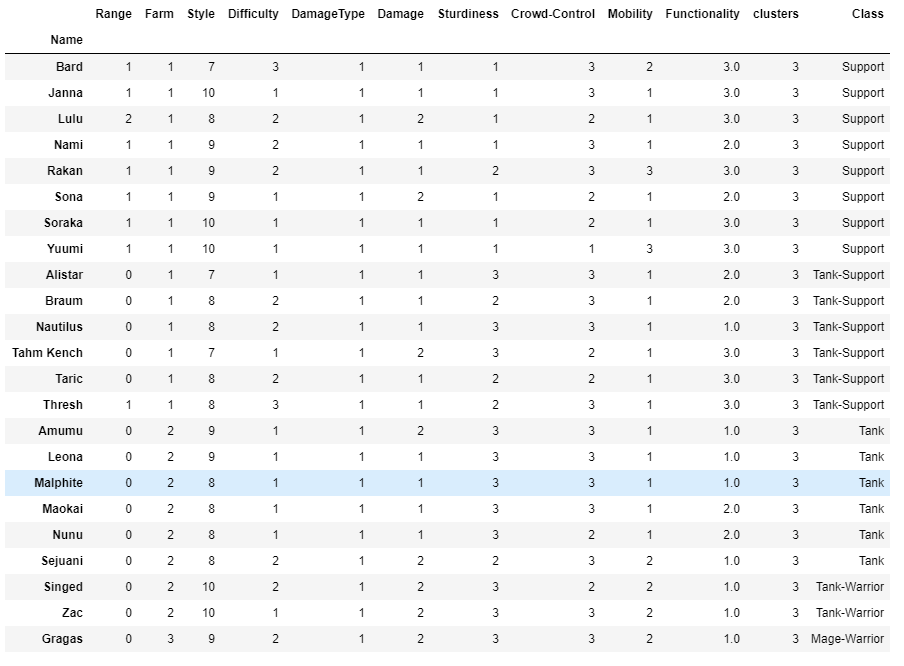

Image as of 2020.04.09 Run

Notable Champions : Bard, Janna, Sona, Tahm Kench, Taric

Outliers : Nunu, Sejuani, Singed, Zac, Gragas, Amumu

The support cluster shows the epitome of the support stereotype. Skill-dependent(Style 8.57) Low farm reliance(1.43) and damage (1.35), while being fairly sturdy(2.17) and high in functionality (2.04) and crowd control (2.61). After all, they are the only class that can heal and move people around. 

Most of them have the support tag included.

The outliers here are usually crowd-control heavy tanks (with no support tag) which go to other lanes. However, as seen from their farm parameters of 2, they are not recommended to take the support role. Some such as Sejuani and Zac even have damage skills based on their HP, so they definitely need a lot of farm to be relevant.

In [ ]:
data_4 = data.reset_index().merge(df,how="left").set_index(data.index.names)
data_4 = data_4.drop(['Id'],axis=1)
data_4 = data_4[data_4['clusters'] == 4]
data_4 = data_4.drop_duplicates()
data_4.head(30)

# Cluster 5 - Tank (Magenta)

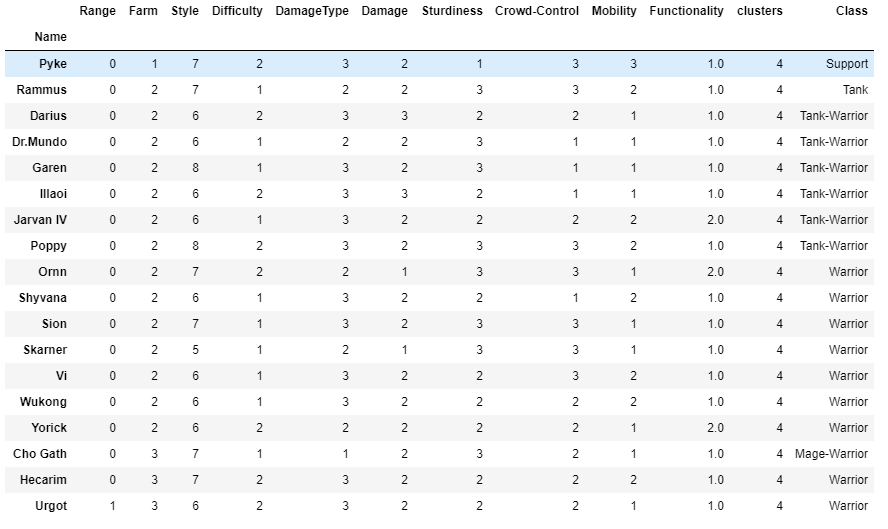

Image as of 2020.04.09 Run

Notable Champions : Rammus, Dr.Mundo, Jarvan IV, Ornn

Outliers : Garen, Darius, **Pyke**, Hecarim, Vi, Wukong

I had a hard time distinguishing this cluster and the next cluster. However, when I run the machine next time, I feel that there could be some mix up between those two clusters. This is the more accurate and consistent sector of the two, with more Warriors and Tanks in the category.

Tanks boast the highest Sturdiness with 2.39, and come with a decent crowd control of 2.17. Their mobility is just average with 1.50, and are quite skill reliant to pull off those crowd controls(Style 6.50). Due to their low farm reliance (2.11), Tanks are one of the staples of the esports scene as they can come online pretty quickly and are item efficient. 

The biggest outlier here is Pyke, who is a support with a measly health due to his passive. Pyke is much more of an assassin, but his mediocre damage(2) low farm and high crowd control must have played a role in clustering into this area.

Garen and Darius are champions better off breaking bones of any reckless melee ADCs or assassins coming close by than initiating and leading the teamfight, so they belong more in fighters category.

Hecarim, Vi, and Wukong are also more of mobile hard punchers than teamfight initiators or tanks, and are somewhat less relevant in the crowd control department (why does Vi, who only has 2 single-target disables, have 3 in CC?). Perhaps, their high style of 7 must have placed them into this category. But as mentioned before, The style category is rather unreliable. All Hecarim does after landing his ultimate is kick someone with E and press W and spam Q till the end of fight.

In [ ]:
data_5 = data.reset_index().merge(df,how="left").set_index(data.index.names)
data_5 = data_5.drop(['Id'],axis=1)
data_5 = data_5[data_5['clusters'] == 5]
data_5 = data_5.drop_duplicates()
data_5.head(30)

# Cluster 6 - Fighter (Orange)

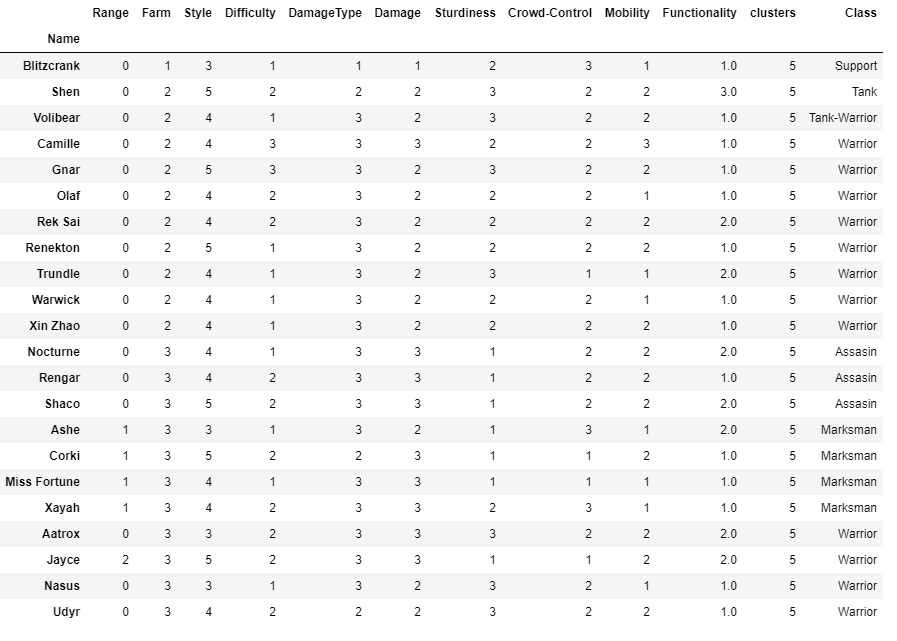

Image as of 2020.04.09 Run

Notable Champions : Gnar, Renekton, Volibear, Olaf, Trundle

Outliers : Nocturne, Rengar, **Ashe, Corki, Miss Fortune, Xayah**, Jayce, Shaco, Shen, Blitzcrank.

I had a hard time figuring out why they placed it so.

Fighters generally have less skill dependency(4.09) (cos you throw autoattacks to 'fight'),and more damage (2.36, highest among non-damage dealer classes) than tanks, but suffer from less sturdiness (2.00) and less crowd control (1.95).

The champions here are very good at one thing - fighting. They can both throw punches and take them, unlike the melee ADCs. However, due to their lack of ability to change situations (low crowd control and functionality) and specialization, they are also shunned in the esports scene. 

The 4 marksmen, Ashe, Corki(well he flys a fighter jet), Miss Fortune and Xayah are all classified here due to the style parameter, which is around 3~5.(much higher than ADC centroid of 2.37). 

This cluster also contains assassins Rengar, Nocturne and Shaco, whom I suspect that are included here for the same reason - style parameter, but for opposite reasons (lower than the assassin centroid of 7.05). I suspect the same reasons for Jayce (more suitable in assassin / mage), and shen (more suitable in tank)

An honorable mention goes to Blitzcrank, as Blitzcrank was originally designed as a fighter rather than a support. (But has proven that he can be usefull even without items)

# Conclusion

Riot Games' champion parameters can cause some confusion. 
It seems that Riot Games has acknowledged this problem, and decided to renew its champion classifications.
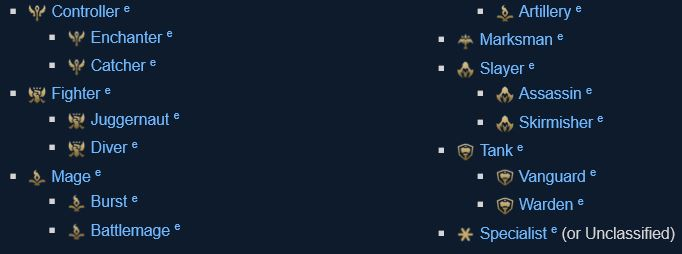

I suggest the following additional datas which can make classification much easier

1. Burst / Sustained Damage, as discussed from the mage section.
2. Single Target / AOE, as also discussed from the mage section.
3. Battle position, whether the champion is more suited protecting the ranged ADC, or pushing the enemy tank from the front, or attempts to cross the line and kill the squishier glass cannons first.
4. Change the definition of 'Style' to 'Skillshot reliance'

I promise to make it prettier by adding more League champion pictures and prettier infographics for the LoL fans out there! 

Maybe next time, I should try the same experiment with players instead of champions, and with more data features. Can Faker, Chovy and DoinB all be classified as the same 'mid laner'? Was Easyhoon a good substitute for Faker, who can keep the opponents guessing on their toes with their different playstyles? Well if there were other datasets, I'll try making and uploading one (though there is work)

Cheers!!